# Lab 4: Dimensionality Reduction
There are two main methods for reducing dimensionality - feature selection and feature extraction

In feature selection, we find $k$ of the $p$ dimensions that give us the most information and we discard the other $p-k$ dimensions. The feature selection includes subset selection 

In feature extraction, we find $k$ dimensions that are combination of original $p$ dimensions. This includes principal component analysis, factor analysis, multidimensional scaling, Isometric feature mapping, etc

## Subset Selection
There are $2^p$ possible subsets of $p$ variables. If $p$ is small, the subset of significant variables can be found by an exhaustive search. Otherwise, we employ heuristics to find the subset.

### Forward selection
We start with no variables and add them one by one. At each step, we train our model on the training set and calculate the misclassification rate for the test set. we add the one that has the minimum misclassification rate. We stop if adding any feature does not decrease the misclassification rate, or if the decrease in error is too small.

In [1]:
# from sklearn.datasets import load_boston
# boston = load_boston()
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print(boston.shape)         # for dataset dimension
print(target)             # for target variable

# convert the data to data frame 
bos = pd.DataFrame(boston)
bos['Price'] = target
X = bos.drop("Price", 1)       # feature matrix 
y = bos['Price']               # target feature
bos.head()

#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
           k_features=13,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
sfs.fit(X, y)
sfs.k_feature_names_     

(506, 13)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 5

C:\Python37\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)

### Backward selection

We start with the full model and delete one variable at a time. At each step, delete the variable that causes the smallest increase in misclassificaiton rate. We stop if removal causes a significant increase in misclassification rate

In [2]:
#Sequential backward selection(sbs)
sbs = SFS(LinearRegression(), 
          k_features=13, 
          forward=False, 
          floating=False,
          cv=0)
sbs.fit(X, y)
print(sbs.k_feature_names_)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)


### Bidirection selection

It is similar to forward selection but the difference is while adding a new feature it also checks the significance of already added features and if it finds any of the already selected features insignificant then it simply removes that particular feature through backward elimination.

In [3]:
# Sequential Forward Floating Selection(sffs)
sffs = SFS(LinearRegression(), 
          k_features=(3,13), 
          forward=True, 
          floating=True,
          cv=0)
sffs.fit(X, y)
sffs.k_feature_names_

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)

## Principal components analysis
Let $X=\{X_1,...,X_p\}$ be the feature variables. PCA can reduce the dimension $p$ by using the linear combinations of $X_1,...,X_p$. 

The principal component $w_1$ maximizes the variance of the projection $z=w_1^TX$ on the direction $w_1$ with $||w_1||=1$, i.e., 

$$w_1 = argmax_w w^T\Sigma w$$

This is a quadratic optimization problem with a constraint $||w_1||=1$. To solve this problem, we add the Lagrange parameter $\alpha$, 

$$w_1^T\Sigma w_1 + \alpha (w_1^Tw_1-1)$$

Taking the derivative with respect to $w_1$, we have $\Sigma w_1 = \alpha w_1$. It follows that $var(z) = \alpha w_1^Tw_1 = \alpha$. Thus, $w_1$ is the eigenvector with the largest eigenvalue. Similarly, the second component is the eigenvector with the second largest eigenvalue and etc.

The proportion of variance explained by the $k$ components is $$\frac{\lambda_1+...+\lambda_k}{\lambda_1+...+\lambda_k+...+\lambda_p}$$

1. If the learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up is a reasonable choice

2. If memory or disk space is limited, PCA allows you to save space in exchange for losing a little of the data's information. This can be a reasonable tradeoff

The limitations of PCA

1. PCA is not scale invariant. check: we need to scale our data first.

2. The directions with largest variance are assumed to be of the most interest

3. Only considers orthogonal transformations (rotations) of the original variables

4. PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this, but some are not.

5. If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances.

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# loading dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data onto unit scale (mean=0 and variance=1)

In [5]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values

x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


The first two components

In [6]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


The proportion of variance explained by the first two components. Together, the first two principal components contain 95.80% of the information

In [7]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

The clustering analysis is applied to the first two components combined with the target variable

In [8]:
df[['target']].head()
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes. Do the classes seem well-separated from each other?

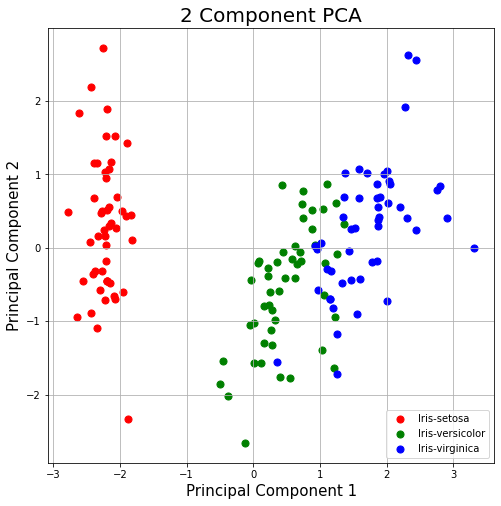

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Factor Analysis
In factor analysis, we assume that there is a set of unobservable latent factors $z_i: j=1,...,k$ which generate $X$, i.e., 

$$X-\mu = Vz+\epsilon$$

where $V$ is the $p\times k$ matrix of weights, called factor loadings. Without loss of generality, we assume $\mu=0$ and $var(z_j)=1$ and $var(\epsilon_i)=\Psi_i$. Thus, 

$$Cov(X) = VV^T + \Psi$$ 

Given data, $Cov(X)$ is estimated by the sample covariance matrix $S$. We know that $S = CDC^T$ where $C$ are eigenvectors. We select the first $k$ eigenvectors $C_k$

$$V = C_kD_k^{1/2}$$

We can find 

$$\Psi_i = s_i^2-\sum_{j=1}^k V_{ij}^2$$

For any orthogonal matrix $T$ with $TT^T=I$, $V'=VT$ is another solution. 

In orthogonal rotation the factors are still orthogonal after rotation. In oblique rotation, the factors are allowed to become correlated. The factors are rotated to give the maximum loading on as few factors as possible for each variable to make the factors inerpretable. This is for knowledge extraction.

Factor analysis can also be used for dimensionality reduction when $k<p$. In this case, we want to find the factor scores $z_j$ from $x_i$. We want to find the loading $w_{ji}$

$$z_j = \sum_{i=1}^p w_{ji}x_i + \epsilon_i$$

where $x_i$ are centered to have mean 0. It indicates

$$Z = XW + \epsilon$$

Thus, 

$$W = (X^TX)^{-1}X^TZ = S^{-1}V$$

and 

$$Z=XS^{-1}V$$ 

We can use the correlation matrix $R$ instead of $S$ when $X$ are normalized to have unit variance.

Loading data

In [10]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

url = "https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv"
df = pd.read_csv(url)
df.columns

# Dropping unnecessary columns
df.drop(['Unnamed: 0','gender', 'education', 'age'],axis=1,inplace=True)

# Dropping missing values rows
df.dropna(inplace=True)

df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis

In [11]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18146.065577235022, 0.0)

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. KMO estimates the proportion of variance among all the observed variable. Lower proportion is more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [12]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8486452309468394

For choosing the number of factors, we can use the Kaiser criterion and scree plot. Here 6 eigenvalues are greater than one. It means we need to choose only 6 factors

In [13]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(df)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

fa.loadings_
fa.get_communalities()
df.values
fa.transform(df)

array([[-1.23855818, -0.3609032 ],
       [-0.03465481,  0.1516786 ],
       [-0.07183735,  0.49407327],
       ...,
       [ 0.57415068, -0.24588987],
       [-0.29289969,  0.95327634],
       [-2.05957751, -1.57872746]])

The scree plot method draws a straight line for each factor and its eigenvalues. Number eigenvalues greater than one considered as the number of factors.

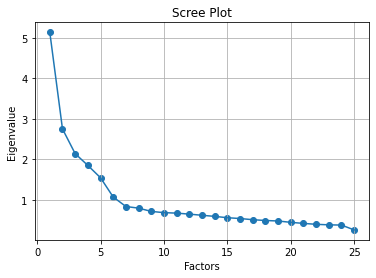

In [14]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## Multidimensional Scaling
Given the pairwise distance matrix $D = d_{ij}$, MDS is the method for placing the points in a low dimension space such that the distance is as close as possible to $d_{ij}$

Let $D_X$ be the $N\times N$ pairwise distance matrix for a data matrix $X_{N\times p}$, where $N$ is the sample size. We want to find a linear map $W: R^p \rightarrow R^k$ and $Z=WX$ such that the distance matrix $D_Z$ for $Z$ is a good approximation to $D_X$

It can be shown that $B=XX^T$ is a linear function of the distance matrix $D_X$. Thus, approximating $D_X$ is equivalent to approximaing $XX^T$. 

From the spectral decomposition, We know that $X=CD^{1/2}$ can be used as an approximation for $X$ where $C$ is the eigenvector matrix and $D$ is the diagonal matrix of eigenvalues. We have

$$Z=C_kD_k^{1/2}$$

This is the same approximation as that in PCA. Thus, PCA on the correlation matrix is equivalent to the MDS on the standardized Eulclidean distances

If the linear mapping $W$ is replaced by a nonlinear mapping $Z = g(X|\theta)$ called Sammon mapping, we want to find the Sammon mapping $g(X|\theta)$ to minimize the Sammon stress

$$\sum_{r,s}\frac{(||Z^r-Z^s||-||X^r-X^s||)^2}{||X^r-X^s||^2}$$

The Sammon mapping $g(X|\theta)$ can be estimated from regression by minimizing the Sammon stress for the training data.

In the case of classification, we can include class information $L$ (the $N\times N$ loss matrix for misclassification) in the distance matrix by

$$d'_{rs} = (1-\alpha)d_{rs} + \alpha L_{rs}$$

### Dimension reduction

In [15]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
X, _ = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [16]:
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(X[:100])
X_transformed.shape

(100, 2)

### Coordinate Learning

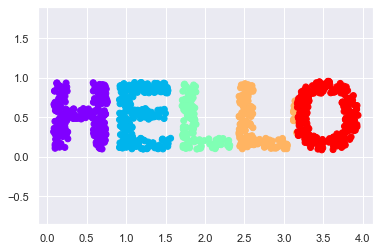

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

The particular choice of x and y values of the dataset are not the most fundamental description of the data: we can scale, shrink, or rotate the data, and the "HELLO" will still be apparent

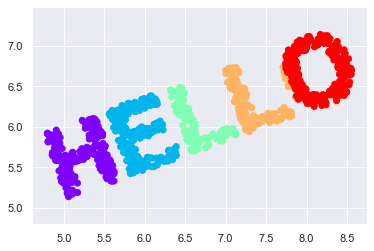

In [18]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

What is fundamental is the distance between each point and the other points in the dataset

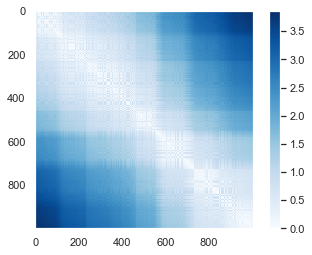

In [19]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

If we similarly construct a distance matrix for our rotated and translated data, we see that it is the same:

In [20]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

Transforming the distances back into x and y coordinates is difficult. This is exactly what the multidimensional scaling algorithm aims to do: given a distance matrix between points, it recovers coordinates

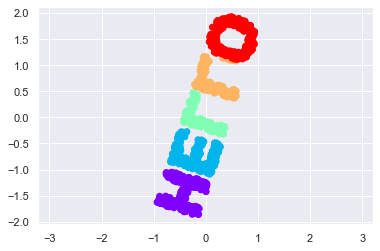

In [21]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

### Manifold Learning
Since distance matrices can be computed from data in any dimension, instead of simply rotating the data "HELLO" in the two-dimensional plane, we can project it into three dimensions using the following function (essentially a three-dimensional generalization of the rotation matrix used earlier):

In [22]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
    
X3 = random_projection(X, 3)
X3.shape

(1000, 3)

Visualizing the points in 3D

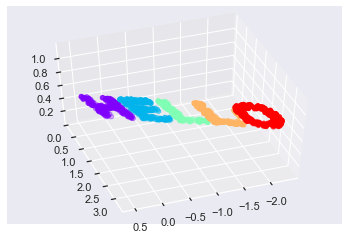

In [23]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

We can now ask the MDS estimator to input this three-dimensional data, compute the distance matrix, and then determine the optimal two-dimensional embedding for this distance matrix. The result recovers a representation of the original data

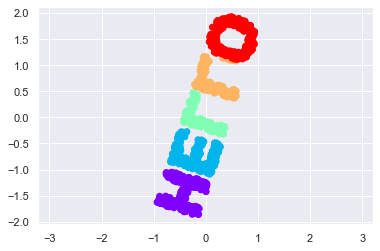

In [24]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

### Nonlinear embedding MDS fails
Linear embeddings, which essentially consist of rotations, translations, and scalings of data into higher-dimensional spaces. MDS breaks down is when the embedding is nonlinear — that is, when it goes beyond this simple set of operations. Consider the following embedding, which takes the input and contorts it into an "S" shape in three dimensions:

In [25]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

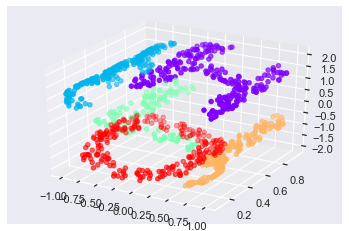

In [26]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize);

The fundamental relationships between the data points are still there, but this time the data has been transformed in a nonlinear way: it has been wrapped-up into the shape of an "S."

If we try a simple MDS algorithm on this data, it is not able to "unwrap" this nonlinear embedding, and we lose track of the fundamental relationships in the embedded manifold:

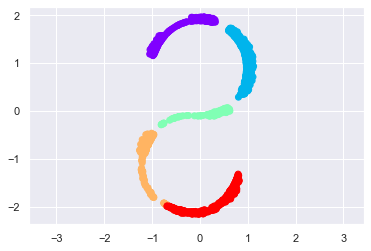

In [27]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal');

This problem can be solved using local linear embedding (LLE, see below)


## Isomap
Taking a series of pictures as a person slowly rotates hs or her head from right to left, the sequence of faces follows a trajectory that is not linear. Thus, similarity between two faces cannot simplybe written in terms of the sum of the pixel differences and Euclidean distance is not a good metric. The images of two different people with the same pose may have smaller Euclidean distance thn the images of two different poses of the same person.

More reasonable distance is the geodesic distance along the manifold. Isometric feature mapping (Isomap) estimates the geodesic distance and applies multidimensional scaling for dimensionality reduction.

Two nodes $r$ and $s$ are locally connected if $||X^r-X^s||<\epsilon$. We set it as the distance between $X^r$ and $X^s$. For two arbitrary nodes on the manifold, their distance $d_{rs}$ is the shortest length path between them. This distance is called graph distance. 

The graph distance provides a good approximation as the number of points increases, though there is the trade-off of longer execution time. If time is critical, we can subsample and use a subset of points to make the algorithm faster

The parameter $\epsilon$ needs to be carefully tuned; if it is two small there might be more than one connected component and if it is too large, shortcut may be added that corrupt the low-dimensional embedding.

One problem with Isomap is that it does not learn a general mappping function that will allow mapping a new test point; the new point should be added to the data set adn the whole algorithm mst be run once more using $N+1$ points


### Manifold learning on a sphere
Generate data on a sphere

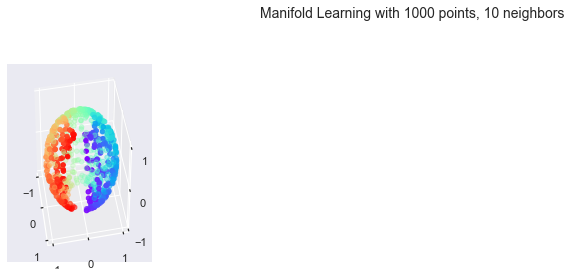

In [28]:
# Author: Jaques Grobler <jaques.grobler@inria.fr>
# License: BSD 3 clause

from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from sklearn.utils import check_random_state

# Unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import warnings

# Variables for manifold learning.
n_neighbors = 10
n_samples = 1000

# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = (t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8)))
colors = p[indices]
x, y, z = (
    np.sin(t[indices]) * np.cos(p[indices]),
    np.sin(t[indices]) * np.sin(p[indices]),
    np.cos(t[indices]),
)

# Plot our dataset.
fig = plt.figure(figsize=(15, 8))
plt.suptitle(
    "Manifold Learning with %i points, %i neighbors" % (1000, n_neighbors), fontsize=14
)

ax = fig.add_subplot(251, projection="3d")
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T

Perform Isomap Manifold learning

ISO: 0.39 sec


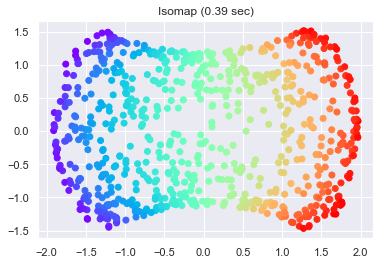

In [29]:
t0 = time()
trans_data = (
    manifold.Isomap(n_neighbors=n_neighbors, n_components=2)
    .fit_transform(sphere_data)
    .T
)
t1 = time()
print("%s: %.2g sec" % ("ISO", t1 - t0))

ax = fig.add_subplot(257)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("%s (%.2g sec)" % ("Isomap", t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")
plt.show()

## Locally Linear Embedding
Each local patch of the manifold can be approximated linearly and given enough data, each point can be written as a linear weighted sum of its neighbors.

Given  $X^r$ and its neighbor $X^s_{(r)}$ in the original space, one can find the reconstruction weights $W_{rs}$ that minimize the error function using least squares subject to $W_{rr}=0$ for all $r$ and $\sum_sW_{rs}=1$

$$\sum_r ||X^r-\sum_s W_{rs}X^s_{(r)}||^2$$

The second step is to keep the weights fixed and find the new coordinates $Z^r$ respecting the interpoint constraints given by the weights, i.e., minimizing the local sum of squared errors

$$\sum_r ||Z^r-\sum_s W_{rs}Z^s_{(r)}||^2$$

Thus, nearby points in the original $p$-dimensional space remain nearby and similarly colocated with respect to one another in the new $k$-dimensional space

The sum of squared errors can be rewritten as $Z^TMZ$, where $M$ is a function of the weight matrix $W$ and it is sparse (a small proportion of data points are neighbors), symmetric, and positive semidefinite. 

We assume that the new coordinates $Z$ are centered at the origin $E(Z)=0$ and are uncorrelated with unit length $Cov(z)=I$. The solution is given by the $k+1$ engenvectors with the smallest eigenvalues. Then we ignore the lowest one and the other $k$ eigenvectors give us the new coordinates.

The $n$ neighbors span a space of dimensionality $n-1$. LLE can reduce dimensionality up to $k\le n-1$. Some margin between $k$ and $n$ is necessary to obtain a good embedding. If $n$ (i.e., $\epsilon$) is small, the graph may no longer connected. If $n$ is large, some neighbors may be too far for the local linearity assumption to hold.

LLE solution is the set of new coordinates, but we do not learn a mappping from the original space to the new space and hence cannot find $z'$ for a new $x'$. To find the new coordinate of $x'$, we can first find the weights $w_s$ for the neighborhood of $x'$ and then use the weights $w_s$ to calculate the new coordinates $z'$ from the new coordinates $Z^s$ of the neighbors $X^s$ of $x'$

$$z' = \sum_s w_sZ^s$$

Alternatively, we can use the original data ${X^t,Z^t}_1^N$ as a training set, and we train a regressor $g(X^t|\theta)$ to approximate $Z^t$ from $X$ by minimizing the regression error with respect to $\theta$

$$\sum_t ||Z^t - g(X^t|\theta)||^2$$

Then we can caculate 

$$z'=g(x'|\theta)$$

### LLE for manifold learning on sphere

standard: 0.16 sec


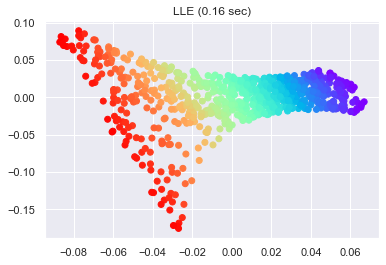

ltsa: 0.25 sec


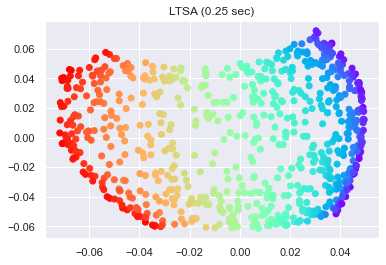

hessian: 0.37 sec


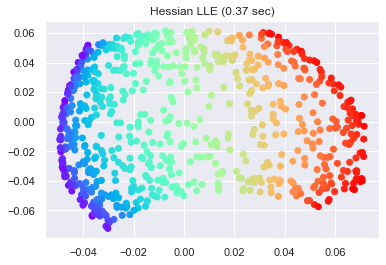

modified: 0.29 sec


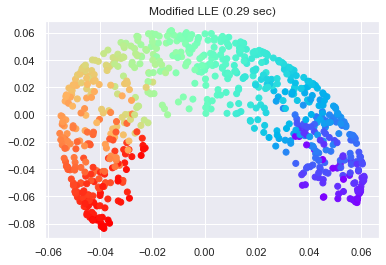

In [30]:
# Perform Locally Linear Embedding Manifold learning
methods = ["standard", "ltsa", "hessian", "modified"]
labels = ["LLE", "LTSA", "Hessian LLE", "Modified LLE"]

for i, method in enumerate(methods):
    t0 = time()
    trans_data = (
        manifold.LocallyLinearEmbedding(
            n_neighbors=n_neighbors, n_components=2, method=method
        )
        .fit_transform(sphere_data)
        .T
    )
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis("tight")
    plt.show()